In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import plotly as pio
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [3]:
walmart = pd.read_csv("SRC_projects/Walmart_Store_sales.csv")

In [4]:
print("Number of rows : {}".format(walmart.shape[0])) #dataset de 150 lignes 
print()

print("Display of dataset: ") #CPI = consumer price index
display(walmart.head())
print()

print("Basics statistics: ")
walmart_desc = walmart.describe(include='all')
display(walmart_desc)
print()

print("Percentage of missing values: ")
display(100*walmart.isnull().sum()/walmart.shape[0]) # certaines colonnes ne pourront pas être utilisées si il y a trop de valeurs manquantes

Number of rows : 150

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092



Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

In [5]:
walmart['Store'] = walmart['Store'].astype('str') # Les valeurs de la colonne Store sont ici catégorielles
walmart = walmart.drop('Date', axis=1) # je supprime la colonne Date qui ne me sera pas utile pour mon étude
walmart = walmart.drop('Holiday_Flag', axis=1) # je supprime la colonne Holiday_flag aussi 

In [6]:
walmart.head()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,1572117.54,59.61,3.045,214.777523,6.858
1,13.0,1807545.43,42.38,3.435,128.616064,7.470
2,17.0,NaN,NaN,NaN,130.719581,5.936
3,11.0,1244390.03,84.57,NaN,214.556497,7.346
4,6.0,1644470.66,78.89,2.759,212.412888,7.092


In [7]:
# J'ai effectué des scatter plots des colonnes Temperature, Fuel Price, CPI et unemployment par rapport à notre colonne cible Weekly Sales
# L'objectif est avant de cibler les outliers ou certaines zones de vides comme par exemple celle que l'on peut observer pour le CPI

In [8]:
walmart = walmart.dropna() #je supprimes toutes les lignes contenant des valeurs manquantes

In [9]:
display(walmart.head())
display(100*walmart.isnull().sum()/walmart.shape[0])

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,1572117.54,59.61,3.045,214.777523,6.858
1,13.0,1807545.43,42.38,3.435,128.616064,7.470
4,6.0,1644470.66,78.89,2.759,212.412888,7.092
6,15.0,695396.19,69.80,4.069,134.855161,7.658
7,20.0,2203523.20,39.93,3.617,213.023622,6.961


Store           0.0
Weekly_Sales    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64

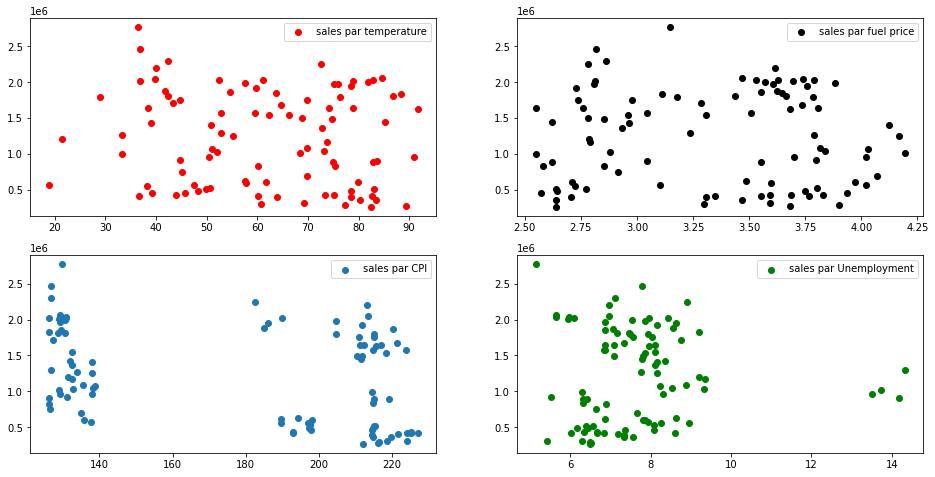

In [10]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
plt.scatter(walmart['Temperature'], walmart['Weekly_Sales'], label="sales par temperature", color='red')
plt.legend()

plt.subplot(2,2,2)
plt.scatter(walmart['Fuel_Price'], walmart['Weekly_Sales'], label="sales par fuel price", color='black')
plt.legend()

plt.subplot(2,2,3)
plt.scatter(walmart['CPI'], walmart['Weekly_Sales'], label="sales par CPI")
plt.legend()

plt.subplot(2,2,4)
plt.scatter(walmart['Unemployment'], walmart['Weekly_Sales'], label="sales par Unemployment", color='green')
plt.legend()

In [11]:
temp_rows_del = []
for index, value in walmart['Temperature'].items():
    if value < 32:
        temp_rows_del.append(index)

walmart = walmart.drop(temp_rows_del, axis=0) # je supprimes les valeurs en dessous de 32 pour la colonne température

unemp_rows_del = []
for index, value in walmart['Unemployment'].items():
    if value > 10:
        unemp_rows_del.append(index) # je supprime les valeurs au dessus de 10 pour la colonne unemployment
        
walmart = walmart.drop(unemp_rows_del, axis=0)

cpi_rows_del = []
for index, value in walmart['CPI'].items():
    if value > 180 and value < 200: # je supprime les valeurs entre 180 et 200 pour la colonne CPI
        cpi_rows_del.append(index)
        
walmart = walmart.drop(cpi_rows_del, axis=0)

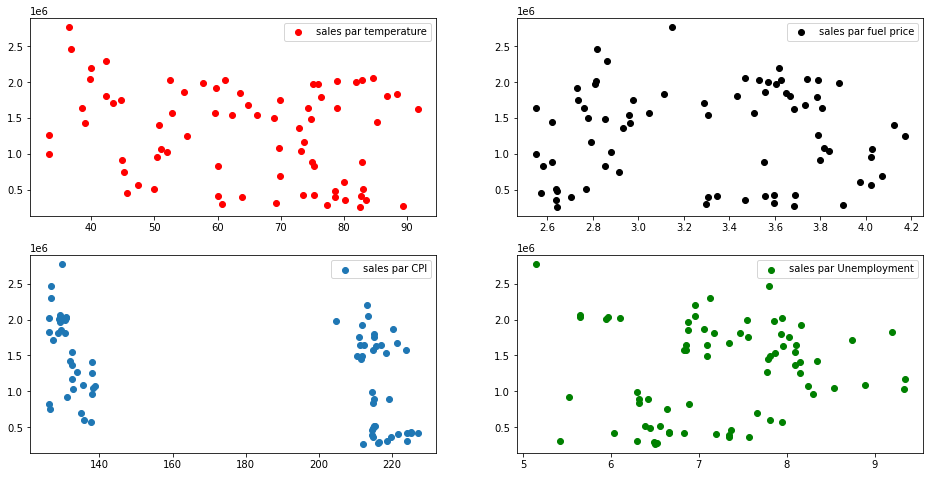

In [12]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
plt.scatter(walmart['Temperature'], walmart['Weekly_Sales'], label="sales par temperature", color='red')
plt.legend()

plt.subplot(2,2,2)
plt.scatter(walmart['Fuel_Price'], walmart['Weekly_Sales'], label="sales par fuel price", color='black')
plt.legend()

plt.subplot(2,2,3)
plt.scatter(walmart['CPI'], walmart['Weekly_Sales'], label="sales par CPI")
plt.legend()

plt.subplot(2,2,4)
plt.scatter(walmart['Unemployment'], walmart['Weekly_Sales'], label="sales par Unemployment", color='green')
plt.legend()

In [13]:
walmart.head()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,1572117.54,59.61,3.045,214.777523,6.858
1,13.0,1807545.43,42.38,3.435,128.616064,7.470
4,6.0,1644470.66,78.89,2.759,212.412888,7.092
6,15.0,695396.19,69.80,4.069,134.855161,7.658
7,20.0,2203523.20,39.93,3.617,213.023622,6.961


In [14]:
walmart.columns = ['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales'] # je change l'ordre des colonnes

In [15]:
cat_features = ['Store'] # ma seule colonne catégorielle
num_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'] #mes colonnes numériques

In [16]:
walmart.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
0,6.0,1572117.54,59.61,3.045,214.777523,6.858
1,13.0,1807545.43,42.38,3.435,128.616064,7.470
4,6.0,1644470.66,78.89,2.759,212.412888,7.092
6,15.0,695396.19,69.80,4.069,134.855161,7.658
7,20.0,2203523.20,39.93,3.617,213.023622,6.961


In [17]:
for x in walmart.columns:
    print(x, walmart[x].dtype)

Store object
Temperature float64
Fuel_Price float64
CPI float64
Unemployment float64
Weekly_Sales float64


In [18]:
X = walmart.iloc[:, :-1] # nos variables explicatives
y = walmart['Weekly_Sales'] # notre colonne cible

In [19]:
y

0      6.858
1      7.470
4      7.092
6      7.658
7      6.961
       ...  
137    9.199
138    6.855
143    7.343
144    6.034
149    8.150
Name: Weekly_Sales, Length: 74, dtype: float64

In [20]:
print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # ON divise le dataset en train_set et test_set
print("...Done")

Dividing into train and test sets...
...Done


In [21]:
# On crée nos notre pipeline pour nos variables 
numeric_features = [1,2,3,4]
cateforical_features = [0]

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, cateforical_features)
])

In [22]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
print("R2 Score sur le train set:", model.score(X_train, y_train)) #On obtient un score de 0.8 pour le train set et un score un peu moins bon sur le test set, ce qui est plutôt bon signe
print("R2 Score sur le test set:", model.score(X_test, y_test))

R2 Score sur le train set: 0.8691179504936826
R2 Score sur le test set: 0.8216555601692791


In [24]:
cross_val_score(model, X_train, y_train, cv=5).mean() #La Cross-Validation est une méthode permettant de tester les performances de notre modèle. C'est une sorte de validation de notre modèle, s'assurer que le résultat que nous avons obtenu n'est pas juste un coup de chance
#ici notre cross val score est en moyenne à 0.63, 

0.6399773188609281

In [25]:
y_train_pred = model.predict(X_train)
y_train_pred

array([8.19488094, 5.65568278, 6.96558324, 7.85372115, 7.59728878,
       7.76615204, 8.40119804, 7.68008309, 8.07708318, 7.92650296,
       6.82183824, 6.57881067, 6.79971122, 6.00798859, 8.39429856,
       7.94440469, 5.68470282, 5.91882656, 9.2535091 , 7.53250872,
       6.95869561, 7.46364945, 6.56      , 7.23059627, 6.99875145,
       6.48852505, 6.54248636, 7.49009558, 6.13765156, 7.5169046 ,
       7.63274819, 8.62763307, 6.40445053, 8.40846891, 8.87485784,
       8.24961923, 5.97891039, 7.13096732, 7.30863429, 6.52819874,
       5.89408299, 8.19123745, 7.82249704, 8.20094282, 6.45616595,
       7.57251367, 7.12816176, 7.29499748, 6.29078662, 8.17144717,
       8.30415662, 7.90392836, 5.89775611, 6.35084665, 8.26276944,
       6.83430977, 7.1189968 , 7.70989261, 6.53989087])

In [26]:
y_test_pred = model.predict(X_test)
y_test_pred[0:5]

array([7.99390851, 7.01284442, 8.69538024, 6.94777021, 6.43847698])

In [27]:
print(model.coef_)
print()
print(len(model.coef_)) #On observer 19 coefficients: c'est du au One hot encoder qui a crée un coefficient pour chaque store

[-0.24080166 -0.02370185 -0.0412338  -3.97891326 -7.51754863 -0.14471531
 -8.43104723 -7.48875742 -9.82691383 -6.42821183 -7.23255761  0.06382086
 -0.76937748 -0.76341411 -9.63641816 -1.69153402 -1.00312417 -1.59440032
 -1.63640434]

19


In [28]:
print(list(preprocessor.transformers_[0][1].get_feature_names_out())) #les noms des features numériques pour les coefficients
print()
print(list(preprocessor.transformers_[1][1].get_feature_names_out())) #idem pour les variables catégorielles

['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

['Store_10.0', 'Store_11.0', 'Store_13.0', 'Store_15.0', 'Store_17.0', 'Store_18.0', 'Store_19.0', 'Store_2.0', 'Store_20.0', 'Store_3.0', 'Store_4.0', 'Store_5.0', 'Store_6.0', 'Store_8.0', 'Store_9.0']


In [29]:
all_columns_names = np.append(list(preprocessor.transformers_[0][1].get_feature_names_out()), list(preprocessor.transformers_[1][1].get_feature_names_out()))
all_columns_names # l'ordre ici est important, dans mon pipeline, les transformer numérique agit avant

array(['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Store_10.0',
       'Store_11.0', 'Store_13.0', 'Store_15.0', 'Store_17.0',
       'Store_18.0', 'Store_19.0', 'Store_2.0', 'Store_20.0', 'Store_3.0',
       'Store_4.0', 'Store_5.0', 'Store_6.0', 'Store_8.0', 'Store_9.0'],
      dtype='<U12')

In [30]:
coeffs = pd.DataFrame({"features": all_columns_names,
                     "coefficients": model.coef_})
coeffs['coefficients'] = coeffs['coefficients'].abs() 
coeffs

,features,coefficients
0,Temperature,0.240802
1,Fuel_Price,0.023702
2,CPI,0.041234
3,Unemployment,3.978913
4,Store_10.0,7.517549
5,Store_11.0,0.144715
6,Store_13.0,8.431047
7,Store_15.0,7.488757
8,Store_17.0,9.826914
9,Store_18.0,6.428212


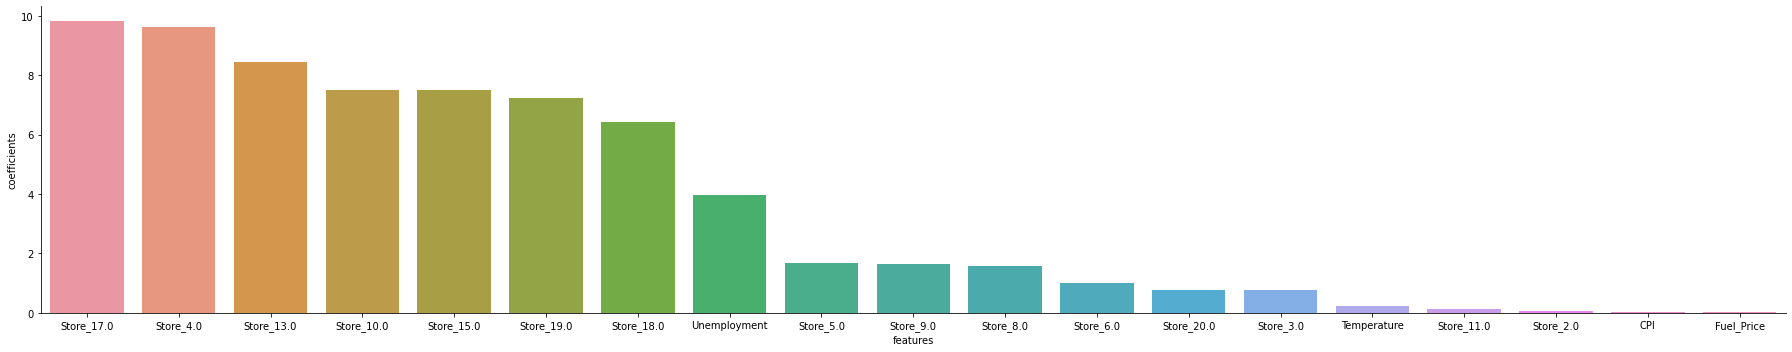

In [31]:
sns.catplot(x = "features", y="coefficients", 
            data=coeffs.sort_values(by="coefficients", ascending=False), 
            kind="bar", aspect=5)

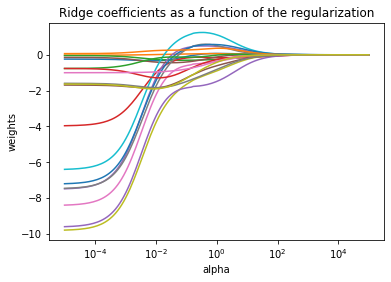

In [32]:
n_alphas = 150
alphas = np.logspace(-5, 5, n_alphas)

#Nous allons maintenant récupérer une erreur baseline, et c'est cette erreur que nous allons tenter d'améliorer avec une régularisation
baseline_error = np.mean((y_test_pred - y_test)**2)

ridge = Ridge()

coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append([baseline_error, np.mean((ridge.predict(X_test) - y_test)**2)]) #réduction de l'estimation des coefficients vers 0

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [41]:
baseline_error

0.14822659309944186

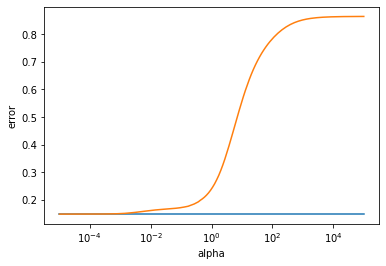

In [33]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [34]:
min(errors)

[0.14822659309944186, 0.1482372816299543]

In [35]:
params = {'alpha': np.arange(0, 2000, 10)}
ridge = Ridge()

grid = GridSearchCV(ridge, params, cv=10, verbose=1)
grid_fit = grid.fit(X_train, y_train)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


In [36]:
print("Optimal value for alpha: ", grid_fit.best_params_)

Optimal value for alpha:  {'alpha': 0}


In [37]:
print('Test score for the best model : ', grid_fit.best_estimator_.score(X_test, y_test))

Test score for the best model :  0.8216554758117317


In [38]:
scores = cross_val_score(grid_fit.best_estimator_, X_train, y_train, cv=10)

print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

The cross-validated R2-score is :  0.49757818371458457
The standard deviation is :  0.38152204355244324


In [39]:
print(scores)

[ 0.69328753  0.75983699  0.58254007  0.37582364 -0.52450172  0.63469572
  0.84788173  0.47653937  0.82058749  0.30909102]


In [40]:
grid.best_estimator_

Ridge(alpha=0)